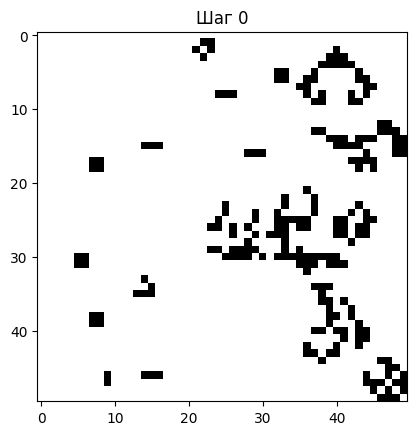

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Размер сетки
ROWS = 50
COLS = 50

# Функция для создания начального состояния сетки случайным образом
def initial_state():
    return np.random.choice([0, 1], size=(ROWS, COLS))

# Функция для обновления состояния сетки на следующем шаге
def update_state(curr_state):
    new_state = np.zeros_like(curr_state)
    for i in range(ROWS):
        for j in range(COLS):
            # Подсчет числа живых соседей
            total_neighbors = np.sum(curr_state[max(0, i-1):min(ROWS, i+2), max(0, j-1):min(COLS, j+2)]) - curr_state[i, j]
            # Логика для обновления клетки
            if curr_state[i, j] == 1:
                if total_neighbors < 2 or total_neighbors > 3:
                    new_state[i, j] = 0
                else:
                    new_state[i, j] = 1
            else:
                if total_neighbors == 3:
                    new_state[i, j] = 1
    return new_state

# Создание начального состояния
state = initial_state()

# Создание фигуры Matplotlib
fig = plt.figure()

# Функция для анимации игры "Жизнь"
def animate(frame):
    global state
    plt.clf()
    state = update_state(state)
    plt.imshow(state, cmap='binary')
    plt.title('Шаг {}'.format(frame))

# Создание анимации
ani = animation.FuncAnimation(fig, animate, frames=100, interval=200)

# Отображение анимации в Jupyter Notebook
from IPython.display import HTML
HTML(ani.to_jshtml())